In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [75]:
def syntag1(y, t, tau_w, stim_func, dopa_func):
    """synaptic tagging model 1. It uses 2 intermediate variables which then would be summed up

    Parameters
    ----------
    y
        tuples of voltage to be integrated
    t
        time vector
    tau_w
        time constant of voltage
    stim_func
        stimulus function of time
    dopa
        presence of dopamine
    """
    w1, w2 = y

    fw1 =  (-w1 + stim_func(t))/tau_w
    fw2 = -w2*(w2-0.5)*(w2-1) + dopa_func(t)

    return [fw1, fw2]

In [47]:
def syntag2(y, t, tc_short, tc_long, stim_func, dopa_func):
    """synaptic tagging model2. time constant of voltage were modulated by dopamine function

    Parameters
    ----------
    y
        tuples of voltage and time constant to be integrated
    t
        time
    tc_short
        short time contant when dopamine does not modulating 
    tc_long
        long time constant when dopamine is modulating
    stim_func
        stimulus function of time
    dopa
        presence of dopamine
    """
    w, gamma = y
    
    stim = stim_func(t)

    fw = (-w + stim) * gamma
    f_gamma = -gamma * (gamma - 1/tc_long) * (gamma - 1/tc_short) + dopa_func(stim)

    return [fw, f_gamma]

In [103]:
DEL_STIM = 0.1

STIM_START = 0.1
STIM_STOP = STIM_START + DEL_STIM

def stim_func(t):
    if t > STIM_START and t <  STIM_STOP:
        return 1
    return 0

In [104]:
def dopa_func(stim):
    if stim > 0:
        return DEL_STIM
    else:
        return 0

In [108]:
del_t = 0.05
max_t = 20

t = np.arange(0, max_t, step=del_t)
y0 = [0., 0.]

sol = odeint(syntag1, y0, t, args=(0.2, stim_func, dopa_func))

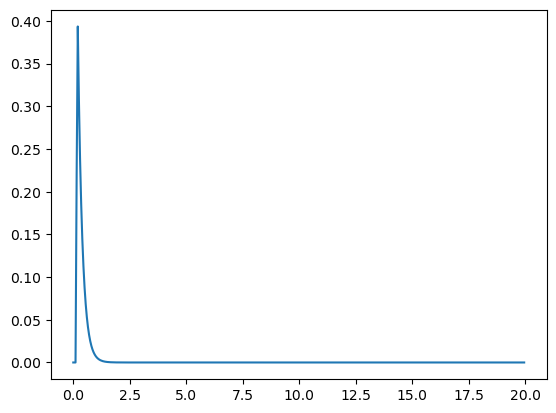

In [109]:
plt.plot(t, sol[:, 0])

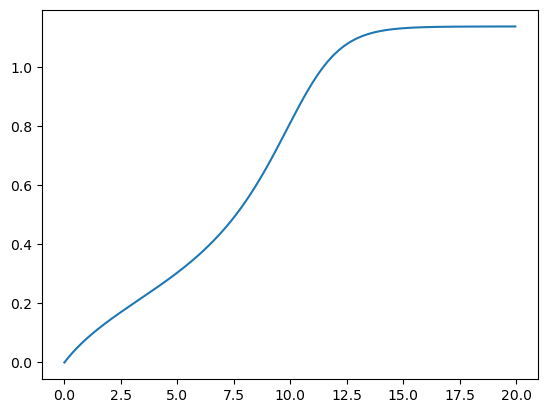

In [110]:
plt.plot(t, sol[:, 1])

In [102]:
sol.shape

(200, 2)